#Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("RealEstates.csv")
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.45857,missing,?,NaN,23086.80050,"$1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.64245,6.002899808,6.730821019,3.09,40173.07217,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.06718,5.86588984,8.51272743,5.13,36882.15940,"$1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.24005,7.188236095,?,NaN,34310.24283,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN
4,4,59982.19723,5.040554523,7.839387785,4.23,26354.10947,"$630,943.49",USNS Raymond\nFPO AE 09386,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


In [ ]:
#From above we see that there is 5000 entries and 9 columns,
#null values are present in avg area comfort and avg.area no. of bedrooms

In [ ]:
df['Avg. Area Number of Bedrooms'].replace('NaN',np.nan,inplace=True)

In [ ]:
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].astype('float64')

In [ ]:
anb_mean=df['Avg. Area Number of Bedrooms'].mean()
anb_mean

3.998082808280828

In [ ]:
df['Avg. Area Number of Bedrooms'].fillna(anb_mean,inplace=True)

#Avg area of comfort have more than 80 % null values so we drop that column

In [ ]:
df.drop('Avg Area Comfort',axis=1,inplace=True)

In [ ]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0,79545.45857,missing,?,3.998083,23086.80050,"$1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1,79248.64245,6.002899808,6.730821019,3.090000,40173.07217,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2,61287.06718,5.86588984,8.51272743,5.130000,36882.15940,"$1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3,63345.24005,7.188236095,?,3.998083,34310.24283,Rs16808.224088392624,USS Barnett\nFPO AP 44820
4,4,59982.19723,5.040554523,7.839387785,4.230000,26354.10947,"$630,943.49",USNS Raymond\nFPO AE 09386


In [ ]:
df['Avg. Area House Age'].replace('missing',np.nan,inplace=True)

In [ ]:
df['Avg. Area House Age']=df['Avg. Area House Age'].astype('float64')

In [ ]:
ah_mean=df['Avg. Area House Age'].mean()
ah_mean

5.976819900733734

In [ ]:
df['Avg. Area House Age'].fillna(ah_mean,inplace=True)

In [ ]:
df['Avg. Area Number of Rooms'].replace('?',np.nan,inplace=True)

In [ ]:
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].astype('float64')

In [ ]:
anr_mean=df['Avg. Area Number of Rooms'].mean()

In [ ]:
anr_mean=df['Avg. Area Number of Rooms'].fillna(anr_mean,inplace=True)

In [ ]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0,79545.45857,5.976820,6.994414,3.998083,23086.80050,"$1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1,79248.64245,6.002900,6.730821,3.090000,40173.07217,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2,61287.06718,5.865890,8.512727,5.130000,36882.15940,"$1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3,63345.24005,7.188236,6.994414,3.998083,34310.24283,Rs16808.224088392624,USS Barnett\nFPO AP 44820
4,4,59982.19723,5.040555,7.839388,4.230000,26354.10947,"$630,943.49",USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   float64
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [ ]:
df['Address'][1].split()[-2]

'CA'

In [ ]:
def state(x):
  s=x.split()[-2]
  return s

In [ ]:
df['state']=df['Address'].apply(state)

In [ ]:
df['state']

0       NE
1       CA
2       WI
3       AP
4       AE
        ..
4995    AP
4996    AA
4997    VA
4998    AE
4999    NV
Name: state, Length: 5000, dtype: object

In [ ]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state
0,0,79545.45857,5.976820,6.994414,3.998083,23086.80050,"$1,059,033.56","208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,1,79248.64245,6.002900,6.730821,3.090000,40173.07217,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,2,61287.06718,5.865890,8.512727,5.130000,36882.15940,"$1,058,987.99","9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,3,63345.24005,7.188236,6.994414,3.998083,34310.24283,Rs16808.224088392624,USS Barnett\nFPO AP 44820,AP
4,4,59982.19723,5.040555,7.839388,4.230000,26354.10947,"$630,943.49",USNS Raymond\nFPO AE 09386,AE


#drop the address and ids columns

In [ ]:
df.drop('ids',axis=1,inplace=True)

In [ ]:
df.drop('Address',axis=1,inplace=True)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.976820,6.994414,3.998083,23086.80050,"$1,059,033.56",NE
1,79248.64245,6.002900,6.730821,3.090000,40173.07217,Rs20078.545531292668,CA
2,61287.06718,5.865890,8.512727,5.130000,36882.15940,"$1,058,987.99",WI
3,63345.24005,7.188236,6.994414,3.998083,34310.24283,Rs16808.224088392624,AP
4,59982.19723,5.040555,7.839388,4.230000,26354.10947,"$630,943.49",AE


#convert all price RS to dollar

In [ ]:
df['Price'][0][0]

'$'

#creating function  to change rs to dollar

In [ ]:
def convert(x):
  if(x[0]=='R'):
    x=x.split('R')
    x=x[-1]
    x=float(x)*75
    return x
  else:
     x=x.split('$')
     x=x[-1]
     return x

In [ ]:
df['Price']=df['Price'].str.replace('s','')
df['Price']=df['Price'].str.replace(',','')

In [ ]:
df['Price_dollar']=df['Price'].apply(convert)

In [ ]:
df['Price_dollar']

0          1059033.56 
1       1505890.914847
2          1058987.99 
3       1260616.806629
4           630943.49 
             ...      
4995    1060193.785885
4996       1482617.73 
4997    1030729.583152
4998       1198656.87 
4999    1298950.480267
Name: Price_dollar, Length: 5000, dtype: object

In [ ]:
df.drop('Price',axis=1,inplace=True)

In [ ]:
#Price column in object we have to convert in float

In [ ]:
df['Price_dollar']=df['Price_dollar'].astype('float64')

In [ ]:
df['Price_dollar'] #price now converted into float

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price_dollar, Length: 5000, dtype: float64

#EDA And Preprocessing

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state,Price_dollar
0,79545.45857,5.976820,6.994414,3.998083,23086.80050,NE,1.059034e+06
1,79248.64245,6.002900,6.730821,3.090000,40173.07217,CA,1.505891e+06
2,61287.06718,5.865890,8.512727,5.130000,36882.15940,WI,1.058988e+06
3,63345.24005,7.188236,6.994414,3.998083,34310.24283,AP,1.260617e+06
4,59982.19723,5.040555,7.839388,4.230000,26354.10947,AE,6.309435e+05


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_dollar
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.976820,6.994414,3.998083,36163.516039,1.232073e+06
std,10657.991214,0.990299,0.829710,1.011621,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.323276,6.687358,3.360000,29403.928700,9.975771e+05
50%,68804.286405,5.973346,6.994414,3.998083,36199.406690,1.232669e+06
75%,75783.338665,6.649509,7.341897,4.280000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.219902,6.500000,69621.713380,2.469066e+06


#use the boxplot on price to check outliers

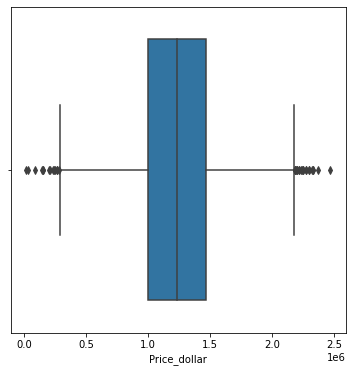

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Price_dollar')
plt.show()

In [ ]:
df[df['Price_dollar'] <-2]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state,Price_dollar


In [ ]:
df[df['Price_dollar'] >2]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state,Price_dollar
0,79545.45857,5.976820,6.994414,3.998083,23086.80050,NE,1.059034e+06
1,79248.64245,6.002900,6.730821,3.090000,40173.07217,CA,1.505891e+06
2,61287.06718,5.865890,8.512727,5.130000,36882.15940,WI,1.058988e+06
3,63345.24005,7.188236,6.994414,3.998083,34310.24283,AP,1.260617e+06
4,59982.19723,5.040555,7.839388,4.230000,26354.10947,AE,6.309435e+05
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.994414,3.998083,22837.36103,AP,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.020000,25616.11549,AA,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.130000,33266.14549,VA,1.030730e+06
4998,68001.33124,5.534388,6.994414,3.998083,42625.62016,AE,1.198657e+06


In [ ]:
def drop_outliers(df,Price_dollar):
    iqr=1.5*(np.percentile(df['Price_dollar'],75)-np.percentile(df['Price_dollar'],25))
    df.drop(df[df['Price_dollar'] > (iqr +np.percentile(df['Price_dollar'],75))].index,inplace=True)
    df.drop(df[df['Price_dollar'] < (np.percentile(df['Price_dollar'],25) -iqr)].index,inplace=True)

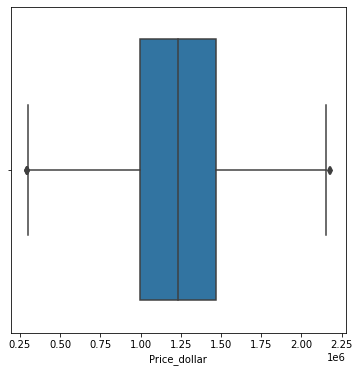

In [ ]:
drop_outliers(df,'Price_dollar')
plt.figure(figsize=(6,6))
sns.boxplot(df['Price_dollar'])
plt.show()

#correlation between datapoints

In [ ]:
df.corr()[('Price_dollar')].sort_values()

Avg. Area Number of Bedrooms    0.144839
Avg. Area Number of Rooms       0.282747
Area Population                 0.399836
Avg. Area House Age             0.443724
Avg. Area Income                0.628043
Price_dollar                    1.000000
Name: Price_dollar, dtype: float64

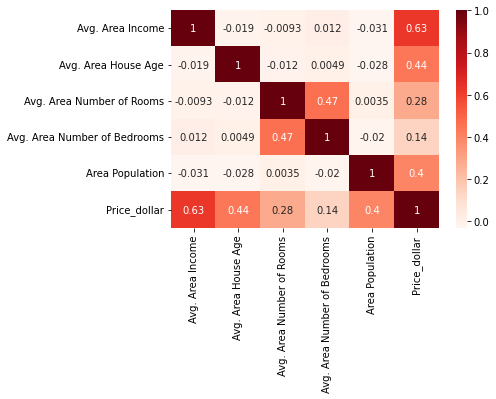

In [ ]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [ ]:
df.skew()

Avg. Area Income               -0.053186
Avg. Area House Age            -0.010726
Avg. Area Number of Rooms      -0.084562
Avg. Area Number of Bedrooms    0.453379
Area Population                 0.057973
Price_dollar                   -0.024453
dtype: float64

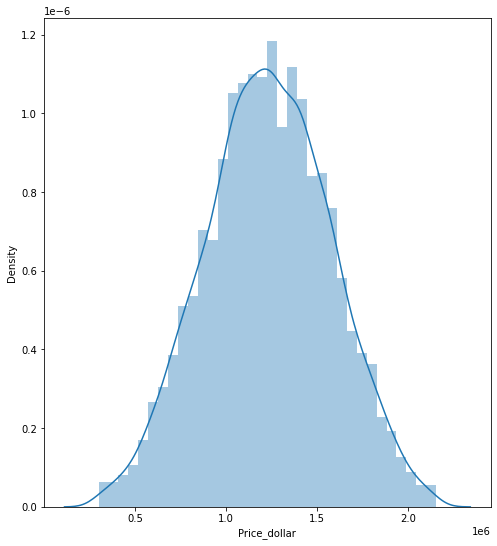

In [ ]:
drop_outliers(df,'Price_dollar')
plt.figure(figsize=(8,9))
sns.distplot(df['Price_dollar'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['state']=le.fit_transform(df['state'])

In [ ]:
df['state']

0       37
1        8
2       59
3        4
4        1
        ..
4995     4
4996     0
4997    55
4998     1
4999    41
Name: state, Length: 4959, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
for col in df:
    sc=StandardScaler()
    df[col]=sc.fit_transform(df[[col]])

In [ ]:
x=df.iloc[:,:-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state
0,1.046376,0.001633,-0.000902,0.000582,-1.322102,0.439100
1,1.018131,0.028086,-0.319703,-0.897954,0.405469,-1.121135
2,-0.691114,-0.110883,1.835412,1.120599,0.072729,1.622727
3,-0.495256,1.230374,-0.000902,0.000582,-0.187314,-1.336340
4,-0.815287,-0.948022,1.021046,0.230061,-0.991748,-1.497744
...,...,...,...,...,...,...
4995,-0.759547,1.881684,-0.000902,0.000582,-1.347322,-1.336340
4996,0.946059,1.038569,-0.506028,0.022269,-1.066366,-1.551545
4997,-0.490931,1.293621,-2.648776,-1.847862,-0.292881,1.407522
4998,-0.052177,-0.447126,-0.000902,0.000582,0.653443,-1.497744


In [ ]:
y=df.iloc[:,-1]
y

0      -0.502982
1       0.803623
2      -0.503116
3       0.086445
4      -1.754713
          ...   
4995   -0.499590
4996    0.735573
4997   -0.585743
4998   -0.094726
4999    0.198532
Name: Price_dollar, Length: 4959, dtype: float64

#train test split data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Accuracy :",r2_score(ytest,ypred))
print("MAE :",mean_absolute_error(ytest,ypred))
print("MSE :",mean_squared_error(ytest,ypred))
print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))

Accuracy : 0.8710880917315098
MAE : 0.285600091680277
MSE : 0.1319945094436124
RMSE : 0.3633104862835814


#now we are going to perform hyperparameter

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
for i in range(1,100):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    print(f"{i}={l2.score(xtest,ytest)}")

1=0.8710835902235585
2=0.8710789244475996
3=0.8710740947298132
4=0.871069101395703
5=0.8710639447700971
6=0.8710586251771507
7=0.871053142940347
8=0.8710474983824994
9=0.8710416918257524
10=0.8710357235915843
11=0.8710295940008078
12=0.8710233033735721
13=0.8710168520293649
14=0.871010240287013
15=0.8710034684646848
16=0.870996536879892
17=0.87098944584949
18=0.8709821956896813
19=0.8709747867160154
20=0.8709672192433913
21=0.8709594935860592
22=0.8709516100576213
23=0.8709435689710345
24=0.8709353706386107
25=0.8709270153720193
26=0.8709185034822885
27=0.8709098352798067
28=0.8709010110743242
29=0.8708920311749547
30=0.8708828958901771
31=0.8708736055278364
32=0.8708641603951461
33=0.8708545607986888
34=0.8708448070444186
35=0.8708348994376618
36=0.8708248382831193
37=0.8708146238848674
38=0.8708042565463595
39=0.8707937365704278
40=0.8707830642592845
41=0.8707722399145237
42=0.8707612638371224
43=0.8707501363274422
44=0.8707388576852312
45=0.8707274282096246
46=0.8707158481991469
47=

In [ ]:
l2=Ridge(alpha=1)
l2.fit(xtrain,ytrain)
l2.score(xtest,ytest)

0.8710835902235585

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,state,Price_dollar
0,1.046376,0.001633,-0.000902,0.000582,-1.322102,0.439100,-0.502982
1,1.018131,0.028086,-0.319703,-0.897954,0.405469,-1.121135,0.803623
2,-0.691114,-0.110883,1.835412,1.120599,0.072729,1.622727,-0.503116
3,-0.495256,1.230374,-0.000902,0.000582,-0.187314,-1.336340,0.086445
4,-0.815287,-0.948022,1.021046,0.230061,-0.991748,-1.497744,-1.754713


In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print("Accuracy :",r2_score(ytest,ypred))
    print("MAE :",mean_absolute_error(ytest,ypred))
    print("MSE :",mean_squared_error(ytest,ypred))
    print("RMSE :",np.sqrt(mean_squared_error(ytest,ypred)))
    return model

In [ ]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [ ]:
mymodel(svm)

Accuracy : 0.8592772611447483
MAE : 0.3003939395084191
MSE : 0.14408776607413473
RMSE : 0.3795889435614988


SVR()

In [ ]:
svm=SVR(kernel='linear')
mymodel(svm)

Accuracy : 0.8714905378477219
MAE : 0.28547405473590576
MSE : 0.13158243984972928
RMSE : 0.36274293907632343


SVR(kernel='linear')

In [ ]:
svm=SVR(kernel='rbf')
mymodel(svm)

Accuracy : 0.8592772611447483
MAE : 0.3003939395084191
MSE : 0.14408776607413473
RMSE : 0.3795889435614988


SVR()

In [ ]:
svm=SVR(kernel='sigmoid')
mymodel(svm)

Accuracy : -505.9495268658985
MAE : 15.113097688357312
MSE : 519.0719384276741
RMSE : 22.78315031833118


SVR(kernel='sigmoid')

In [ ]:
svm=SVR(kernel='poly')
mymodel(svm)

Accuracy : 0.6994680133368953
MAE : 0.42102966895156296
MSE : 0.3077184465308775
RMSE : 0.5547237569555477


SVR(kernel='poly')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'C' : [1,100],'gamma' : [0.1,0.01],'kernel' : ['rbf']}

In [ ]:
grid=GridSearchCV(SVR(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   9.2s
[CV] END .......................C=100, gamma=0.1,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 100], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
ac=r2_score(ytest,ypred)
ac

0.8592772611447483

# User Input

In [ ]:
Income=input("Enter your Income :")
House_Age=input("Enter your House_Age :")
No_Rooms=input("Enter your No_Rooms :")
No_Bedrooms=input("Enter your No_Bedrooms :")
Population=input("Enter your Population :")
State=input("Enter your State :")

data=[Income,House_Age,No_Rooms,No_Bedrooms,Population,State]

print((l2.predict([data])),end="")

Enter your Income :40000
Enter your House_Age :20
Enter your No_Rooms :4
Enter your No_Bedrooms :3
Enter your Population :5
Enter your State :3
[26056.1648274]